<a href="https://colab.research.google.com/github/yashrajkakkad/ml-spotify/blob/master/SVM_GridSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/ml-spotify/data_merged.csv')
df.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence,year,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,minor,major,acousticness_ar,danceability_ar,duration_ms_ar,energy_ar,instrumentalness_ar,liveness_ar,loudness_ar,speechiness_ar,tempo_ar,valence_ar,popularity_ar,count,key_0_ar,key_1_ar,key_2_ar,key_3_ar,key_4_ar,key_5_ar,key_6_ar,key_7_ar,key_8_ar,key_9_ar,key_10_ar,key_11_ar,minor_ar,major_ar,acousticness_yr,danceability_yr,duration_ms_yr,energy_yr,instrumentalness_yr,liveness_yr,loudness_yr,speechiness_yr,tempo_yr,valence_yr,popularity_yr,mode,key_0_yr,key_1_yr,key_2_yr,key_3_yr,key_4_yr,key_5_yr,key_6_yr
0,0.0131,0.2560,182347,0.895,0,0.000106,0.0821,-4.860,29,0.0707,191.307,0.5550,1978,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.145175,0.523720,221014.800000,0.726840,0.023547,0.174298,-7.711613,0.045116,132.180853,0.701493,36.833333,150.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.341064,0.538997,247988.145057,0.552657,0.103383,0.217524,-11.095111,0.064961,120.209319,0.583424,35.272231,1,0,0,1,0,0,0,0
1,0.9800,0.2770,206972,0.145,0,0.879000,0.1110,-19.898,0,0.0845,75.644,0.4940,1953,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.962233,0.464711,199313.805031,0.217114,0.549370,0.166036,-14.844384,0.071003,102.967642,0.539736,2.974843,159.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.891747,0.440834,216552.259500,0.267418,0.314625,0.221442,-15.414304,0.092591,110.008113,0.432251,3.672500,1,1,0,0,0,0,0,0
2,0.7950,0.6850,314667,0.483,0,0.878000,0.1130,-10.202,1,0.0337,97.694,0.8540,1954,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0.866200,0.630400,291778.600000,0.567800,0.895600,0.114200,-10.003400,0.040800,117.398600,0.837800,6.800000,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.867413,0.460371,225951.758500,0.263561,0.291320,0.216008,-15.342991,0.103243,108.561912,0.447291,7.707000,1,0,0,0,1,0,0,0
3,0.6560,0.7880,179747,0.808,0,0.000000,0.1540,-6.590,0,0.0395,113.046,0.9690,1954,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.721667,0.739333,175231.000000,0.745000,0.000001,0.077933,-4.730333,0.138767,127.433000,0.929667,2.000000,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.867413,0.460371,225951.758500,0.263561,0.291320,0.216008,-15.342991,0.103243,108.561912,0.447291,7.707000,1,0,0,0,1,0,0,0
4,0.3020,0.0753,498560,0.150,0,0.884000,0.1210,-16.705,0,0.0371,76.558,0.0351,1951,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0.817780,0.196522,521790.596429,0.309415,0.665675,0.246221,-15.794201,0.041948,94.257485,0.111619,1.666667,280.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.900334,0.461423,212773.310500,0.257270,0.303290,0.219540,-15.724956,0.107351,109.569882,0.443625,3.419500,1,1,0,0,0,0,0,0


In [ ]:
df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence,year,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,minor,major,acousticness_ar,danceability_ar,duration_ms_ar,energy_ar,instrumentalness_ar,liveness_ar,loudness_ar,speechiness_ar,tempo_ar,valence_ar,popularity_ar,count,key_0_ar,key_1_ar,key_2_ar,key_3_ar,key_4_ar,key_5_ar,key_6_ar,key_7_ar,key_8_ar,key_9_ar,key_10_ar,key_11_ar,minor_ar,major_ar,acousticness_yr,danceability_yr,duration_ms_yr,energy_yr,instrumentalness_yr,liveness_yr,loudness_yr,speechiness_yr,tempo_yr,valence_yr,popularity_yr,mode,key_0_yr,key_1_yr,key_2_yr,key_3_yr,key_4_yr,key_5_yr,key_6_yr
count,172230.000000,172230.000000,1.722300e+05,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,1.722300e+05,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.0,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000
mean,0.501914,0.536246,2.326718e+05,0.480989,0.067956,0.194968,0.211396,-11.777780,25.925913,0.105896,116.937762,0.525249,1976.582001,0.126052,0.077675,0.108425,0.041944,0.076258,0.095146,0.052674,0.122586,0.061244,0.103728,0.071317,0.062951,0.296853,0.703147,0.501584,0.536435,2.331120e+05,0.489073,0.208777,0.219263,-11.764703,0.106143,116.948677,0.525494,26.663026,280.709934,0.158579,0.084283,0.117558,0.019776,0.052685,0.102909,0.032248,0.159357,0.039767,0.121204,0.056930,0.054706,0.137061,0.896661,0.502270,0.535962,232770.994232,0.480734,0.196542,0.211121,-11.790694,0.105839,116.936730,0.525269,25.711704,1.0,0.365111,0.058857,0.096325,0.052262,0.329356,0.092243,0.005847
std,0.379394,0.175858,1.471768e+05,0.272032,0.251670,0.332974,0.180661,5.690105,21.866745,0.183053,30.290836,0.264392,26.708673,0.331909,0.267661,0.310917,0.200462,0.265412,0.293417,0.223382,0.327962,0.239777,0.304908,0.257355,0.242875,0.456873,0.456873,0.337781,0.134129,1.024398e+05,0.229039,0.278240,0.100423,4.772058,0.170707,14.195599,0.183700,19.632363,532.441502,0.365284,0.277812,0.322085,0.139230,0.223405,0.303841,0.176657,0.366009,0.195411,0.326365,0.231709,0.227406,0.343913,0.304401,0.256267,0.047857,25342.186737,0.157887,0.093779,0.015704,2.853440,0.094468,5.594350,0.055638,15.219180,0.0,0.481463,0.235358,0.295037,0.222555,0.469981,0.289369,0.076241
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,1920.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.042000e+03,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.189632,0.415141,140135.140496,0.208856,0.099986,0.162309,-20.840083,0.051205,100.033149,0.378276,0.090909,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.091300,0.414000,1.662000e+05,0.248000,0.000000,0.000000,0.099300,-14.935750,1.000000,0.035200,93.834000,0.311000,1955.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [ ]:
len(df.columns), df.columns

(72,
 Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
        'instrumentalness', 'liveness', 'loudness', 'popularity', 'speechiness',
        'tempo', 'valence', 'year', 'key_0', 'key_1', 'key_2', 'key_3', 'key_4',
        'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11',
        'minor', 'major', 'acousticness_ar', 'danceability_ar',
        'duration_ms_ar', 'energy_ar', 'instrumentalness_ar', 'liveness_ar',
        'loudness_ar', 'speechiness_ar', 'tempo_ar', 'valence_ar',
        'popularity_ar', 'count', 'key_0_ar', 'key_1_ar', 'key_2_ar',
        'key_3_ar', 'key_4_ar', 'key_5_ar', 'key_6_ar', 'key_7_ar', 'key_8_ar',
        'key_9_ar', 'key_10_ar', 'key_11_ar', 'minor_ar', 'major_ar',
        'acousticness_yr', 'danceability_yr', 'duration_ms_yr', 'energy_yr',
        'instrumentalness_yr', 'liveness_yr', 'loudness_yr', 'speechiness_yr',
        'tempo_yr', 'valence_yr', 'popularity_yr', 'mode', 'key_0_yr',
        'key_1_yr', 'key_2_y

In [ ]:
mean_popularity = 42
y_prime = [1 if i >= mean_popularity else 0 for i in df["popularity"]]
# y = pd.concat([df.id, pd.Series(y_prime, name="popularity")], axis=1)
y_popl = pd.concat([pd.Series(y_prime, name="popularity")], axis=1)
# y_popl["popularity"].value_counts()
y = y_popl["popularity"]

In [ ]:
drop_cols = ["popularity", "mode", "loudness", "loudness_ar", "loudness_yr"]
X = df.drop(drop_cols, axis=1)
len(X.columns), X.columns

(67,
 Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
        'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence',
        'year', 'key_0', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6',
        'key_7', 'key_8', 'key_9', 'key_10', 'key_11', 'minor', 'major',
        'acousticness_ar', 'danceability_ar', 'duration_ms_ar', 'energy_ar',
        'instrumentalness_ar', 'liveness_ar', 'speechiness_ar', 'tempo_ar',
        'valence_ar', 'popularity_ar', 'count', 'key_0_ar', 'key_1_ar',
        'key_2_ar', 'key_3_ar', 'key_4_ar', 'key_5_ar', 'key_6_ar', 'key_7_ar',
        'key_8_ar', 'key_9_ar', 'key_10_ar', 'key_11_ar', 'minor_ar',
        'major_ar', 'acousticness_yr', 'danceability_yr', 'duration_ms_yr',
        'energy_yr', 'instrumentalness_yr', 'liveness_yr', 'speechiness_yr',
        'tempo_yr', 'valence_yr', 'popularity_yr', 'key_0_yr', 'key_1_yr',
        'key_2_yr', 'key_3_yr', 'key_4_yr', 'key_5_yr', 'key_6_yr'],
       dtype='objec

In [ ]:
X.shape, y.shape

((172230, 67), (172230,))

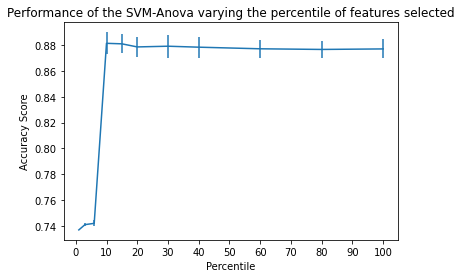

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectPercentile, chi2
import matplotlib.pyplot as plt

clf = Pipeline([('anova', SelectPercentile(chi2)),
                ('scaler', StandardScaler()),
                ('svc', SVC(gamma="auto"))])

# #############################################################################
# Plot the cross-validation score as a function of percentile of features
score_means = list()
score_stds = list()
percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 100)

for percentile in percentiles:
    clf.set_params(anova__percentile=percentile)
    this_scores = cross_val_score(clf, X_train[:20000], y_train[:20000])
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())

plt.errorbar(percentiles, score_means, np.array(score_stds))
plt.title(
    'Performance of the SVM-Anova varying the percentile of features selected')
plt.xticks(np.linspace(0, 100, 11, endpoint=True))
plt.xlabel('Percentile')
plt.ylabel('Accuracy Score')
plt.axis('tight')
plt.show()

In [ ]:
from sklearn.feature_selection import SelectPercentile, chi2
X = SelectPercentile(chi2, percentile=10).fit_transform(X, y)

scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X.shape

(172230, 7)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

In [ ]:
%%time
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report

# Set the parameters by cross-validation
tuned_parameters = [
#                         'kernel': ['rbf'], 
#                         'gamma': [1e-3, 1e-4],
#                         'C': [1, 10, 100, 1000]
#                     },
                    {
                        'kernel': ['linear'],
                        'C': [1000, 1e4]
                    }]

scores = ['recall', 'f1']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s' % score
    )
    clf.fit(X_train[:10000], y_train[:10000])

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_true, y_pred))
    print()

# svm = LinearSVC(random_state=42, tol=1e-5, max_iter=10000)
# svm.fit(X_train[:50000], y_train[:50000])
# # print("Train accuracy of svm algo:", svm.score(X_train, y_train))
# # print("Test accuracy of svm algo:", svm.score(X_test, y_test))


# cv_scores = cross_val_score(svm, X_train[:100000], y_train[:100000], cv=3)
# print("Cross Validation scores - ", cv_scores)

# y_train_pred = cross_val_predict(svm, X_train[:100000], y_train[:100000])

# confusion_matrix = confusion_matrix(y_train[:100000], y_train_pred)
# print("Confusion matrix\n", confusion_matrix)

# p_score = precision_score(y_train[:100000], y_train_pred)
# rc_score = recall_score(y_train[:100000], y_train_pred)
# f1_score = f1_score(y_train[:100000], y_train_pred)
# p_score, rc_score, f1_score
# print("Recall score = ", rc_score)
# print("Precision score = ", p_score)
# print("F1 score = ", f1_score)

# print("Classification report\n")
# print(classification_report(y_train[:100000], y_train_pred))

# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'C': 10000.0, 'kernel': 'linear'}

Grid scores on development set:

0.685 (+/-0.043) for {'C': 1000, 'kernel': 'linear'}
0.687 (+/-0.039) for {'C': 10000.0, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

[[23981  1445]
 [ 2819  6201]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92     25426
           1       0.81      0.69      0.74      9020

    accuracy                           0.88     34446
   macro avg       0.85      0.82      0.83     34446
weighted avg       0.87      0.88      0.87     34446


# Tuning hyper-parameters for f1

Best parameters set found on development set:

{'C': 10000.0, 'kernel': 'linear'}

Grid scores on development set:

0.744 (+/-0.035) for {'C': 1000, 'kernel': 'linear'}
0.745 (+/-0.032) for {'C': 10000.0, 'k